<a href="https://colab.research.google.com/github/Csarabia2002/Tarea2_agrupamiento-clustering-_y_reduccion_dimensionalidad/blob/main/reduccion_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reduccion de dimensionalidad SEEDS**

In [ ]:
import pandas as pd

# Nombres de columnas según el dataset
columnas = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'class']

# Cargar el archivo desde el mismo directorio del notebook
df_seeds = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columnas)

# Mostrar las primeras filas para verificar
df_seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df_seeds.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
 7   class          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [ ]:
df_seeds.isnull().sum()

,0
area,0
perimeter,0
compactness,0
length,0
width,0
asymmetry,0
groove_length,0
class,0


In [ ]:
# Separar variables y etiquetas
X = df_seeds.drop('class', axis=1)
y = df_seeds['class']

# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

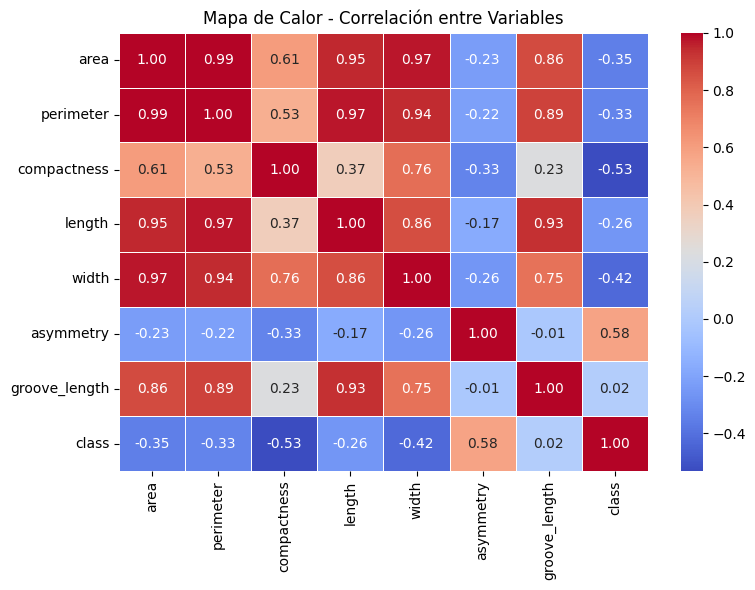

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = df_seeds.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.tight_layout()
plt.show()

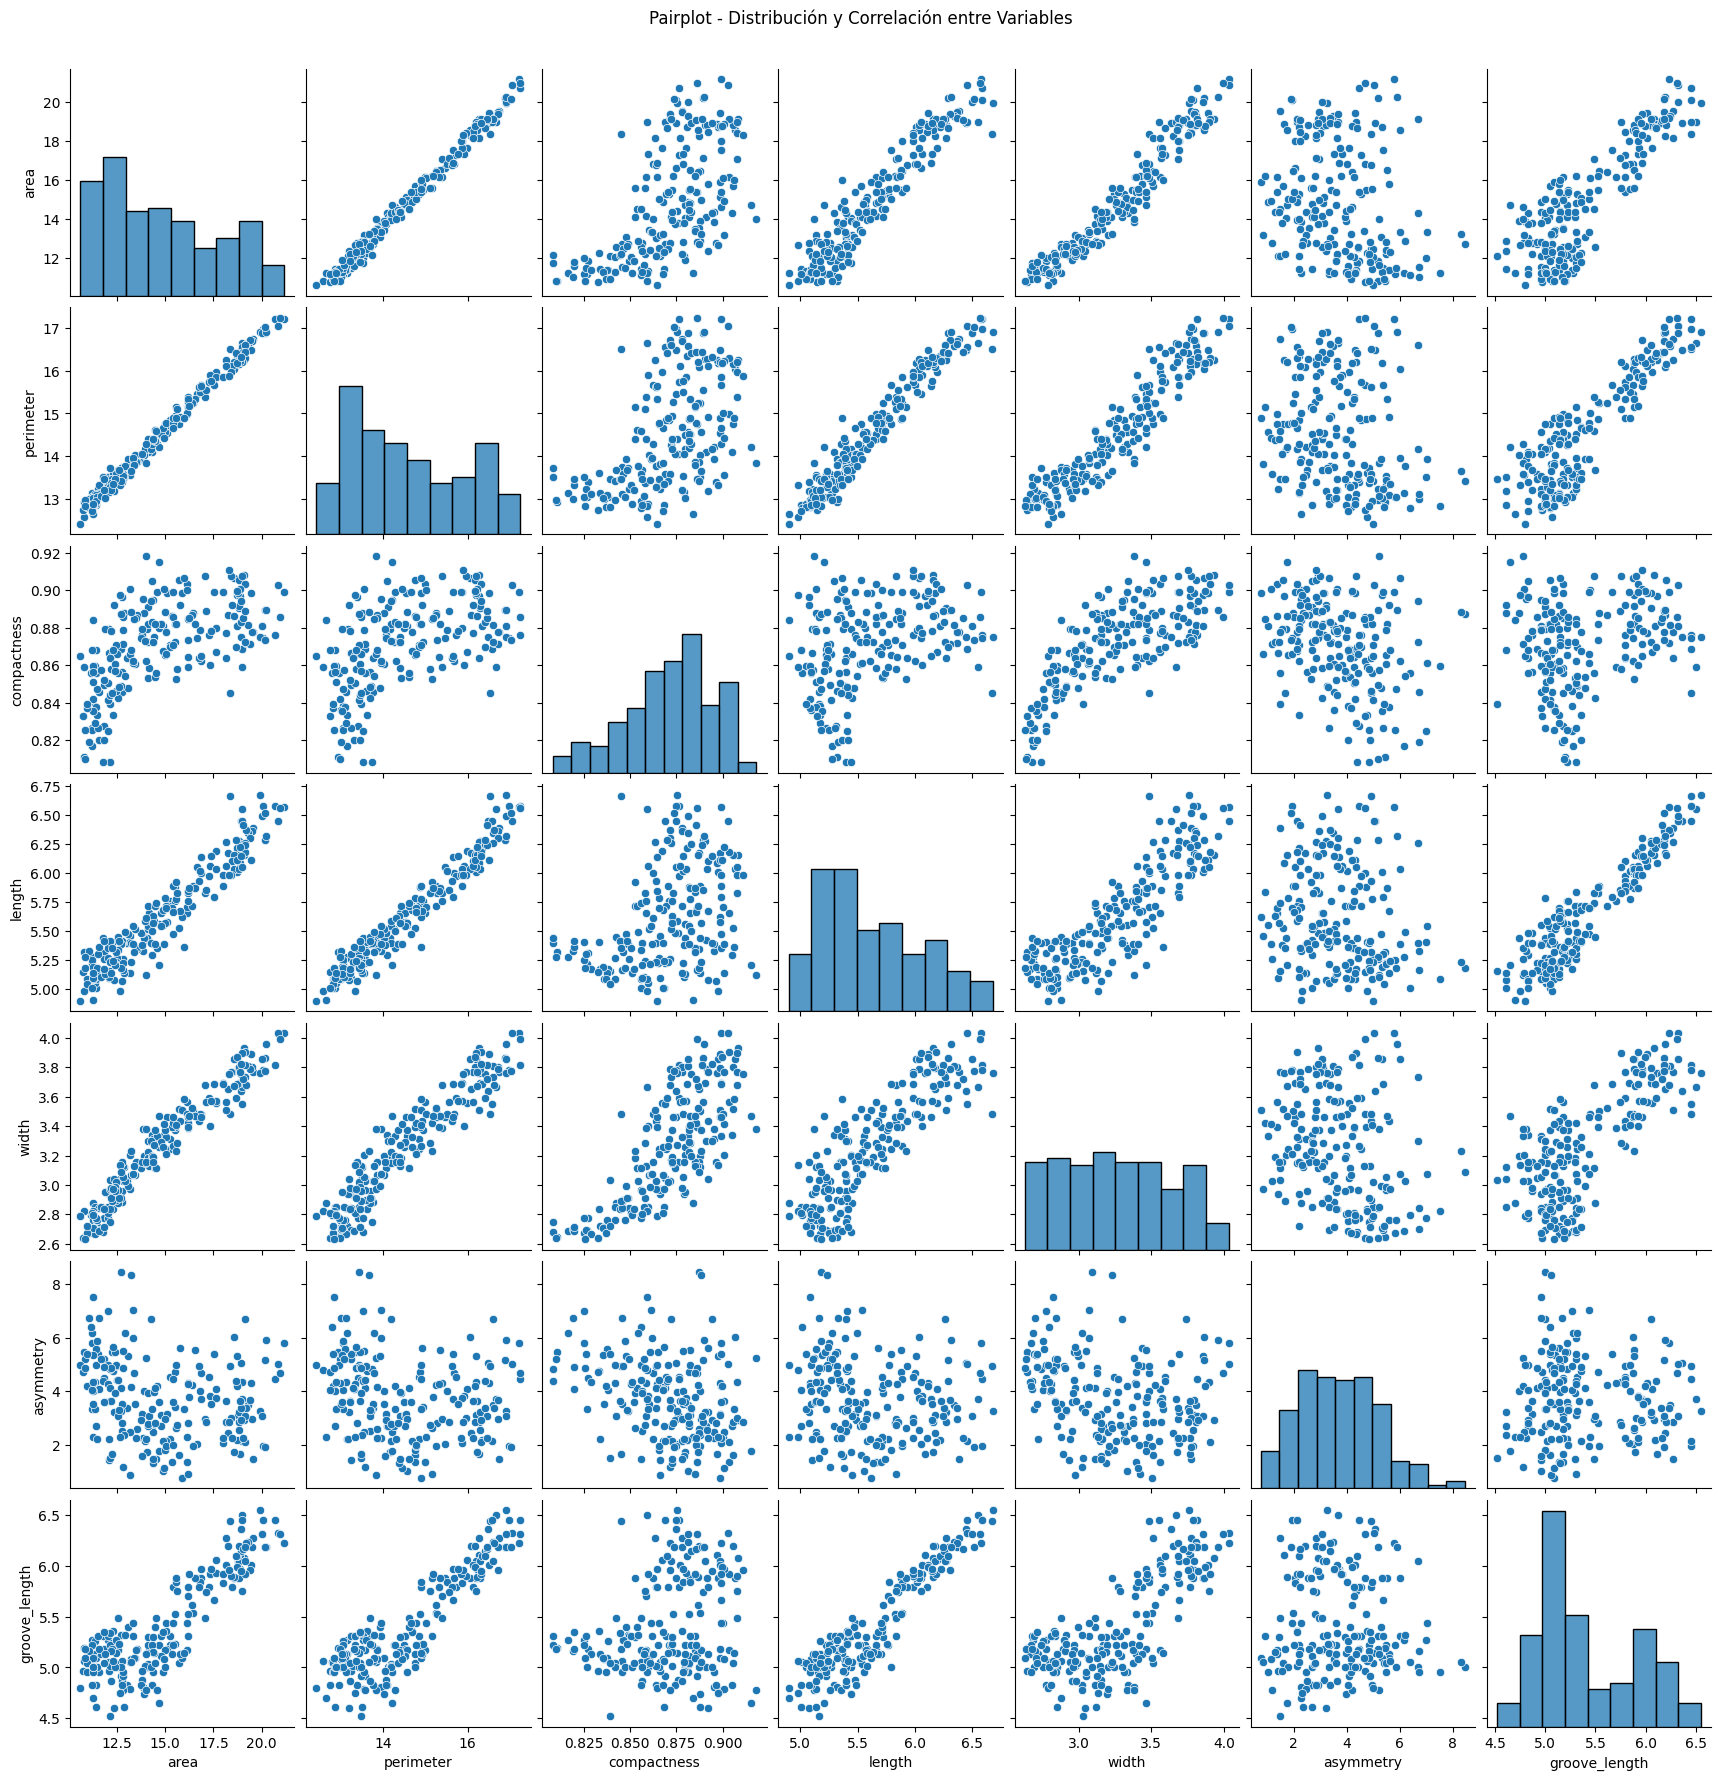

In [ ]:
# prompt: create a correlation plot with scatter and distribution with seaborn (sns)

import matplotlib.pyplot as plt
# Seleccionar las columnas numéricas para el pairplot
numerical_cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']

# Crear el pairplot
sns.pairplot(df_seeds[numerical_cols])
plt.suptitle("Pairplot - Distribución y Correlación entre Variables", y=1.02)
plt.show()

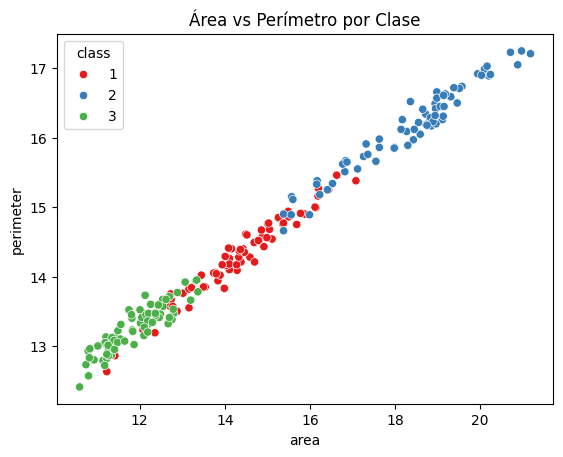

In [ ]:
sns.scatterplot(data=df_seeds, x='area', y='perimeter', hue='class', palette='Set1')
plt.title("Área vs Perímetro por Clase")
plt.show()



# **Interpretacion:**
* Correlación positiva: Existe una clara correlación positiva entre el área y el perímetro para todas las clases. A medida que aumenta el área, el perímetro también tiende a aumentar.

* Conglomerados diferenciados: Cada clase forma un conglomerado relativamente distinto, lo que indica que, dentro de cada clase, los valores de área y perímetro son relativamente similares, pero difieren significativamente entre clases.


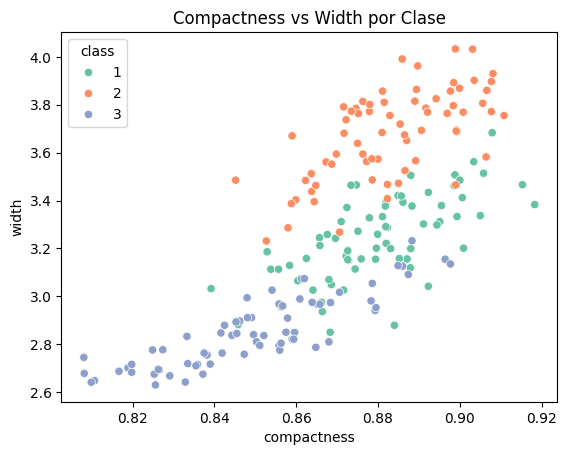

In [ ]:
# compactness vs width
sns.scatterplot(data=df_seeds, x='compactness', y='width', hue='class', palette='Set2')
plt.title("Compactness vs Width por Clase")
plt.show()


# **Interpretacion:**
-Existe una correlacion positiva entre compactness y width donde a mayor compacidad mayor es el ancho en general.

* Clase 3 (Canadiense) (azul): tiene en promedio los valores más bajos de compactness y width. Se agrupa más hacia la parte inferior izquierda.

* Clase 2 (rosa) (naranja): tiende a tener los valores más altos en ambas variables y se agrupa en la parte superior derecha.

* Clase 1 (kama) (verde):  Esta en una posicion intermedia entre las dos clases

# **Patrones ocultos:**
-Solapamiento entre Kama y Rosa:
Aunque las clases están bien diferenciadas, Kama (1) y Rosa (2) muestran cierto solapamiento en la zona de compactness entre 0.86 y 0.89 y width entre 3.2 y 3.6.

-En la clase Rosa (naranja), parece haber dos
subgrupos: uno más concentrado entre (0.875, 3.5) y otro más disperso por encima de 3.8 en width. Esto podría sugerir variabilidad genética o subtipos dentro de la clase.


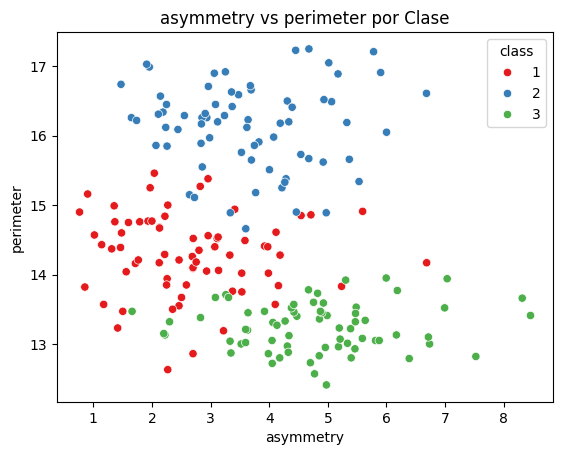

In [ ]:
sns.scatterplot(data=df_seeds, x='asymmetry', y='perimeter', hue='class', palette='Set1')
plt.title("asymmetry vs perimeter por Clase")
plt.show()

# ***Interpretacion:***
- la relación entre 'asymmetry' y 'perimeter' no es tan clara ni lineal. Los puntos de cada clase están más dispersos y mezclados en términos de asimetría.

- La separabilidad entre las clases es mucho menor utilizando la asimetría y el perímetro. las clases Kama (rojo) y Canadiense (verde) se mezclan considerablemente, especialmente en sus valores de asimetría intermedios y bajos. Hay una zona de superposición importante entre Kama y Canadiense.

# ***Patrones ocultos:***
- Se ve claramente que la clase Kama (rojo) y Canadiense (verde) se superponen significativamente.
- Lo Oculto: La forma y densidad específica de esta superposición no es uniforme. No es una mezcla homogénea en toda la región de intersección.
- Observa la región central del gráfico (aproximadamente, perímetro entre 13.5 y 14.5, y asimetría entre 2.5 y 4.5). Aquí, la mezcla de puntos rojos y verdes es muy densa y aparentemente aleatoria.


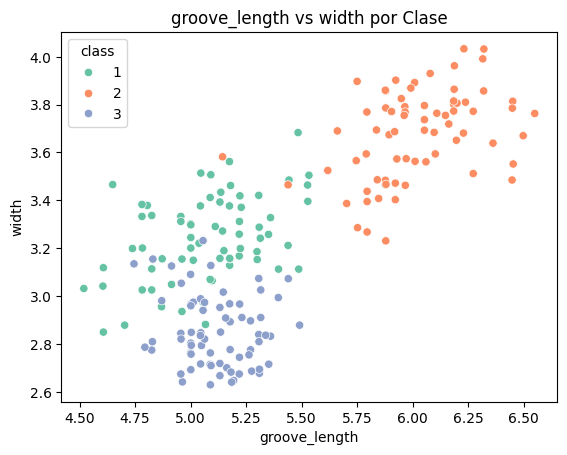

In [ ]:
sns.scatterplot(data=df_seeds, x='groove_length', y='width', hue='class', palette='Set2')
plt.title("groove_length vs width por Clase")
plt.show()

# **Interpretacion:**
- Clase 2 (Rosa - naranja): Se agrupa en la parte superior derecha del gráfico, con valores generalmente altos de 'groove_length' y 'width'. Forma un cluster relativamente denso y bien separado de las otras dos clases. hay una clara correlación positiva. A medida que 'groove_length' aumenta, 'width' también tiende a aumentar.

- Clase 1 (Kama - verde azulado): Se encuentra en un rango intermedio de ambas variables. Se superpone notablemente con la Clase 3. la correlación es menos pronunciada y los puntos están más dispersos. Parece haber una ligera tendencia positiva, pero es débil.

- Clase 3 (Canadiense - azul lavanda): Tiende a tener los valores más bajos de 'width' y valores intermedios de 'groove_length'. Se superpone con la Clase 1. la correlación también es muy débil o casi nula, y los puntos están bastante dispersos verticalmente para un rango dado de 'groove_length'.

# **Patrones ocultos:**
-  La forma específica de la mezcla. Parece que los puntos de la Clase 3 (azul lavanda) tienden a tener un 'width' más bajo, mientras que los de la Clase 1 (verde azulado) tienen un 'width' más alto para un 'groove_length' similar. Sin embargo, en el rango de 'groove_length' entre 4.75 y 5.25, y 'width' entre 2.9 y 3.2, la mezcla es muy densa.

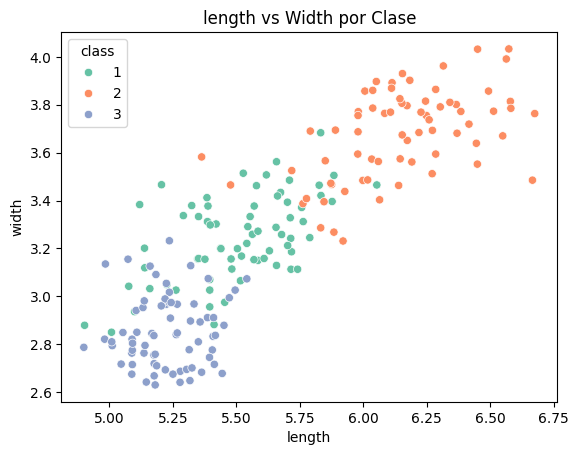

In [ ]:
sns.scatterplot(data=df_seeds, x='length', y='width', hue='class', palette='Set2')
plt.title("length vs Width por Clase")
plt.show()

# **Interpretacion:**
- Clase 2 (Rosa): Es la más distintiva, agrupándose en la parte superior derecha con mayores longitudes y anchos, mostrando una clara separación de las otras dos clases.
- Clase 3 (Canadiense): Se ubica en la parte inferior izquierda, con las menores longitudes y anchos.
- Clase 1 (Kama): Se encuentra en una posición intermedia, solapándose significativamente tanto con la Clase 3 (Canadiense) en el rango de valores bajos como con la Clase 2 (Rosa) en los valores intermedios.

# **Patrones ocultos:**
- Dificultad de Separación entre Kama y Canadiense: El solapamiento entre la Clase 1 (Kama) y la Clase 3 (Canadiense) es un patrón importante. Indica que la longitud y el ancho por sí solos no son suficientes para diferenciarlas claramente en algunas observaciones.

- Gradiente de Tamaño: Existe un patrón de tamaño ascendente de Canadiense (pequeña) a Kama (intermedia) a Rosa (grande) basado en longitud y ancho.

- Transición entre Kama y Rosa: Aunque Rosa es distinta, el solapamiento con Kama sugiere una posible continuidad o zona de transición entre estas dos clases.

- Distinción Clara de Rosa: La Clase 2 (Rosa) es la más distintiva. Sus observaciones tienden a ser más grandes (mayor longitud y ancho) que las de las otras dos clases, lo que las hace relativamente fáciles de separar utilizando solo estas dos características.

# **Reduccion de dimensionalidad PCA**

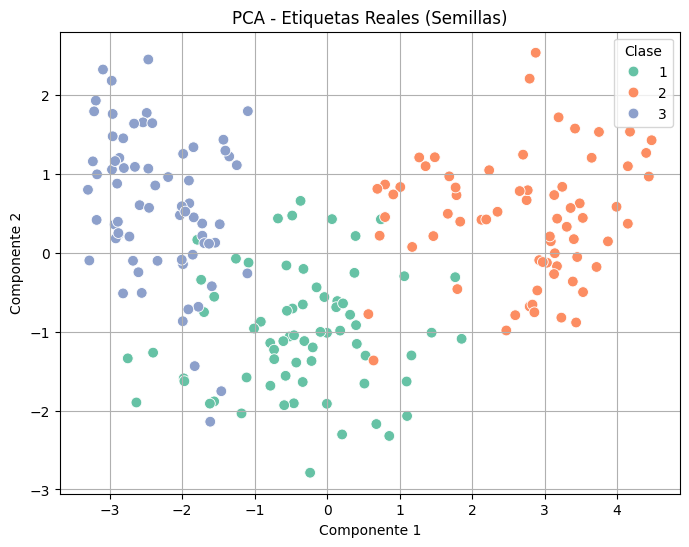

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=60)
plt.title('PCA - Etiquetas Reales (Semillas)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()


# **Patrones ocultos**
- Aunque están mayormente separadas, hay varios puntos verdes (Kama) que se acercan o se mezclan con el grupo naranja (Rosa), especialmente entre los valores de Componente 1 entre 0 y 2.
- Dentro de cada clase, hay cierta estructura interna:
Clase 2 (Rosa) muestra dos agrupaciones: una más centrada cerca de (3, 0) y otra extendida hacia arriba.
- Clase 3 (Canadiense, azul) tiene una forma más alargada verticalmente (en Componente 2), lo que sugiere que tiene más variabilidad interna en ese eje.
- La forma como las clases se distribuyen sugiere que una frontera lineal no separaría perfectamente a las tres clases.
- La mayor parte de la separación ocurre a lo largo del eje horizontal (Componente 1), lo que indica que probablemente haya una o dos variables originales muy importantes contribuyendo fuertemente a esa componente



# **REDUCCION DE DIMENSIONALIDAD t-SNE**

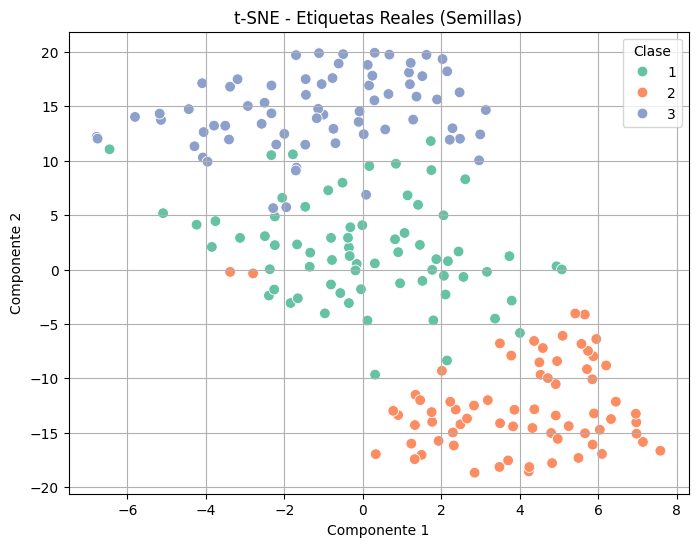

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set2', s=60)
plt.title('t-SNE - Etiquetas Reales (Semillas)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()

# **Patrones ocultos**
- Dentro de cada clase, especialmente en Kama y Rosa, se ven subgrupos locales:
Algunos puntos de Kama están más cerca de Canadiense o de Rosa, sugiriendo variación interna en sus características (posible mezcla de subtipos o ruido).
Rosa tiene una estructura más densa y simétrica; podría indicar una clase más homogénea.
- Las tres clases forman grupos bien definidos y separados, lo cual indica que los datos tienen una estructura natural que t-SNE logró capturar.
Clase 2 (Rosa, naranja) está bien delimitada en la zona inferior.
Clase 3 (Canadiense, azul) se agrupa fuertemente en la zona superior.
Clase 1 (Kama, verde) queda en el centro, ligeramente dispersa y con cierto solapamiento con las otras.

- Clase 2 (Rosa) ocupa más espacio horizontal y vertical, pero sin perder cohesión: esto sugiere mayor diversidad interna pero aún bien agrupada.
Clase 3 (Canadiense) es compacta y separada: muy distinta a las demás.
Kama es más difusa: posiblemente sujeta a errores de clasificación.





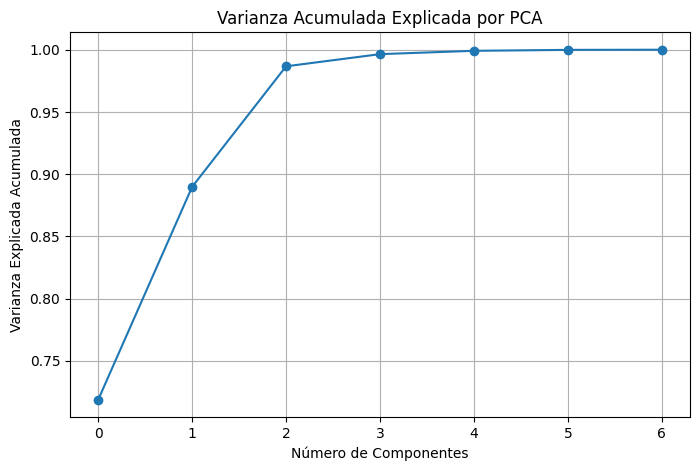

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA completo para ver la varianza explicada
pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Varianza Acumulada Explicada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# **REDUCCION_DIMENSIONALIDAD BANKNOTE_AUTHENTICATION**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Nombres de columnas según la descripción
columnas = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

# Cargar el archivo (ajusta la ruta si es necesario)
df_billetes = pd.read_csv('data_banknote_authentication.txt', header=None, names=columnas)

# Separar características y etiquetas
X_billetes = df_billetes.drop('class', axis=1)
y_billetes = df_billetes['class']

# Escalar los datos
scaler = StandardScaler()
X_scaled_billetes = scaler.fit_transform(X_billetes)

df_billetes.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df_billetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


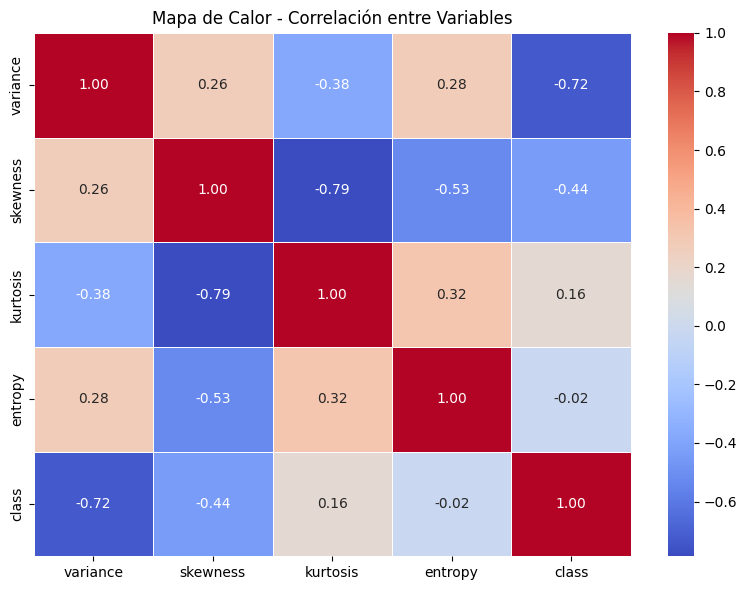

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = df_billetes.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.tight_layout()
plt.show()

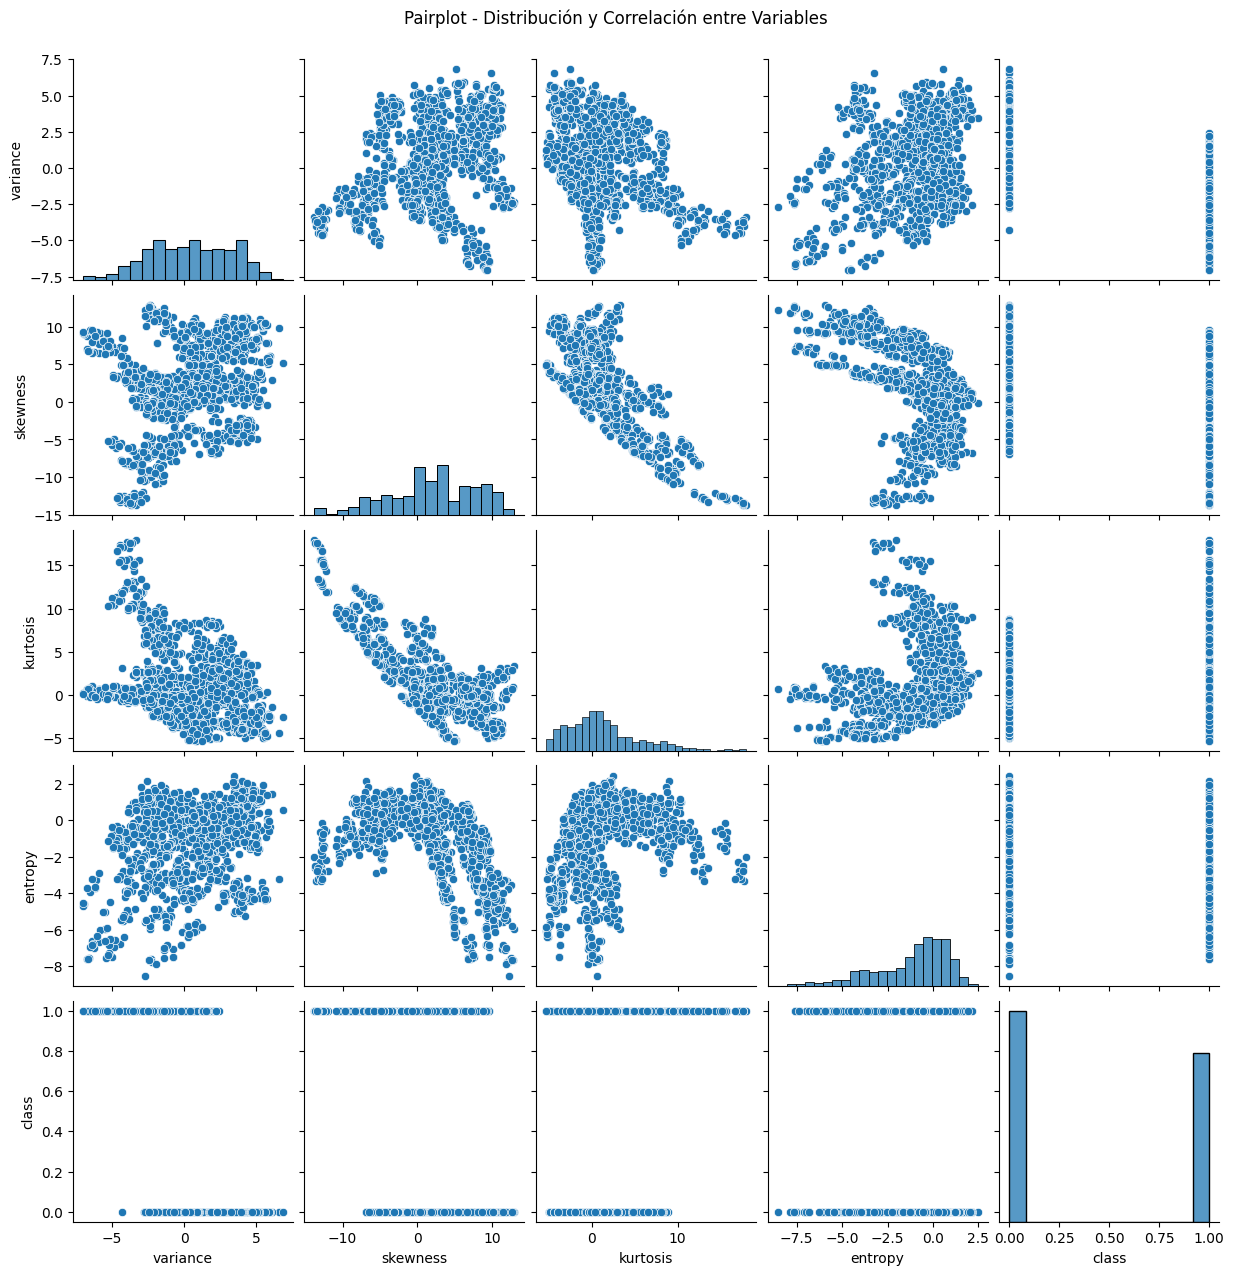

In [ ]:
import matplotlib.pyplot as plt
# Seleccionar las columnas numéricas para el pairplot
numerical_cols = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']
# Crear el pairplot
sns.pairplot(df_billetes[numerical_cols])
plt.suptitle("Pairplot - Distribución y Correlación entre Variables", y=1.02)
plt.show()

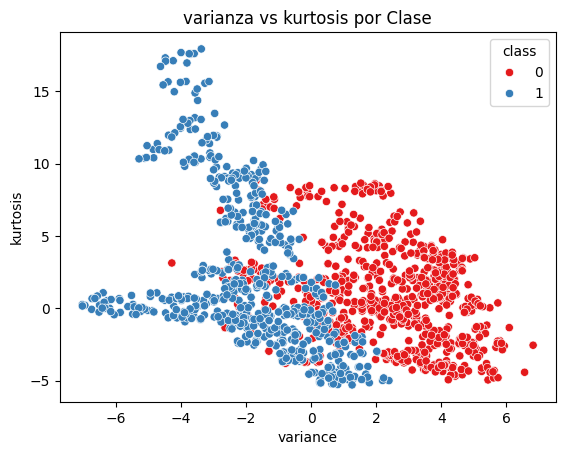

In [ ]:
sns.scatterplot(data=df_billetes, x='variance', y='kurtosis', hue='class', palette='Set1')
plt.title("varianza vs kurtosis por Clase")
plt.show()


# **Patrones Ocultos:**
- Los billetes genuinos (azules) parecen tener una concentración más alta en valores de varianza negativos (por ejemplo, entre -7 y -3).
Los billetes falsos (rojos) muestran una distribución más amplia de la varianza, incluyendo una buena cantidad de billetes con varianza positiva (por ejemplo, entre 0 y 6).

- La región con varianza muy baja (por ejemplo, < -4) y curtosis que varía parece estar dominada casi exclusivamente por billetes genuinos (azules). Esta es una zona donde un clasificador podría tener alta confianza.
- La región con varianza alta (por ejemplo, > 4) y curtosis positiva (por ejemplo, > 0) parece contener principalmente billetes falsos (rojos).
- La región central del gráfico, donde ambas clases se mezclan, es donde la clasificación sería más desafiante utilizando solo estas dos características.-

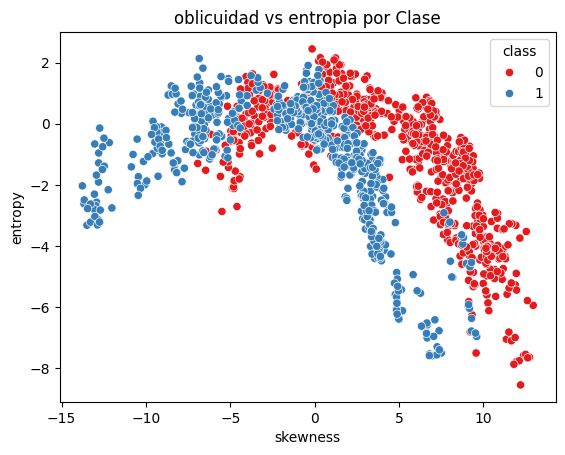

In [ ]:
sns.scatterplot(data=df_billetes, x='skewness', y='entropy', hue='class', palette='Set1')
plt.title("oblicuidad vs entropia por Clase")
plt.show()


# ***Patrones ocultos:***
- El principal solapamiento ocurre en la región donde la oblicuidad está entre aproximadamente -5 y 5. En esta zona, ambas clases se mezclan considerablemente, haciendo que la distinción sea más difícil. Los billetes falsos se "infiltran" en la zona de billetes genuinos y viceversa.
- Ambas clases, en conjunto, forman una especie de patrón en forma de "arco" o "U invertida" en el espacio de características. Los puntos "suben" en entropía cuando la oblicuidad está cerca de cero y "bajan" a medida que la oblicuidad se vuelve más extrema (muy negativa o muy positiva)

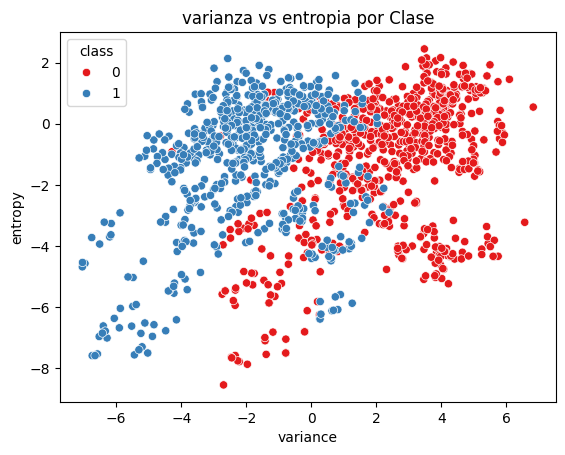

In [ ]:
sns.scatterplot(data=df_billetes, x='variance', y='entropy', hue='class', palette='Set1')
plt.title("varianza vs entropia por Clase")
plt.show()

# **Patrones ocultos:**
- El solapamiento más denso y crítico ocurre a lo largo de una banda diagonal que atraviesa el centro del gráfico, donde la varianza está aproximadamente entre -2 y 2, y la entropía está entre -3 y 1.
- La región con baja varianza (ej. < -2) y baja entropía (ej. < -4) está casi exclusivamente compuesta por billetes genuinos (azules). Esta es una zona de alta confianza para identificar billetes auténticos.
- La región con alta varianza (ej. > 2) y alta entropía (ej. > 0) está mayormente ocupada por billetes falsos (rojos). Aquí también se podría tener alta confianza en la clasificación.

# **PCA**

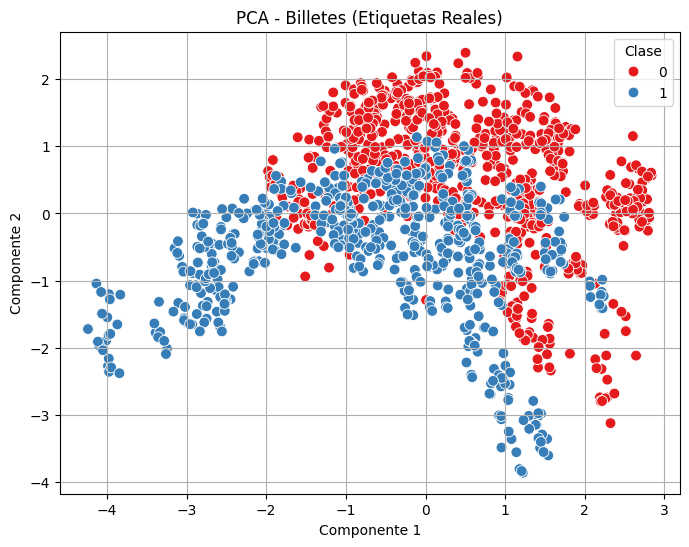

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
pca_billetes = PCA(n_components=2)
X_pca_billetes = pca_billetes.fit_transform(X_scaled_billetes)

# Visualización PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_billetes[:, 0], y=X_pca_billetes[:, 1], hue=y_billetes, palette='Set1', s=60)
plt.title('PCA - Billetes (Etiquetas Reales)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()


# **Patrones Ocultos:**
- Hay un solapamiento significativo entre las dos clases, especialmente en la región central del gráfico (alrededor de los valores de Componente 1 entre -1 y 1, y Componente 2 entre -1 y 1).
- Algunos puntos que parecen estar lejos de la mayoría de su clase podrían ser valores atípicos que representan billetes falsos particularmente bien hechos que se parecen a los verdaderos, o billetes verdaderos muy dañados que se parecen a los falsos.


# **t-SNE**

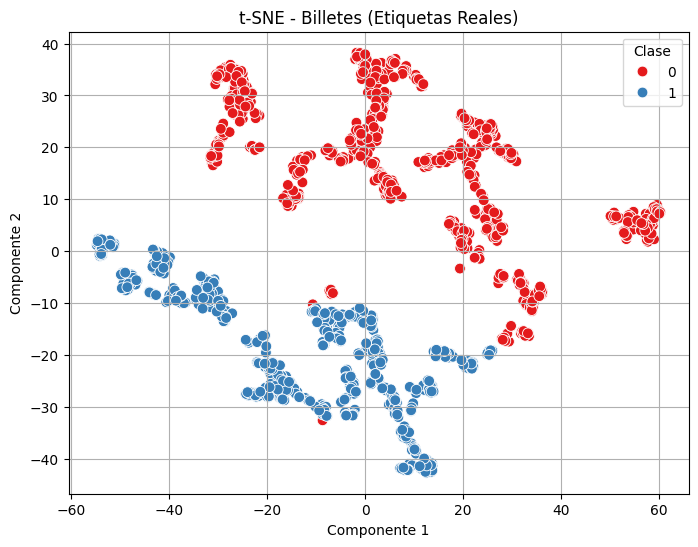

In [ ]:
from sklearn.manifold import TSNE

# t-SNE
tsne_billetes = TSNE(n_components=2, random_state=42)
X_tsne_billetes = tsne_billetes.fit_transform(X_scaled_billetes)

# Visualización t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne_billetes[:, 0], y=X_tsne_billetes[:, 1], hue=y_billetes, palette='Set1', s=60)
plt.title('t-SNE - Billetes (Etiquetas Reales)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()
